# __Assignment 1 part 2: Diabetes dataset__

Student name: Phan Hoang An Nguyen

Dataset name: Diabetes 130-US Hospitals for Years 1999-2008

Dataset source: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

Published article: Kanu, D. K. S., Kathmandu, N., & Khanal, M. Implementation of Big Data Analytics on Diabetes 130-US Hospitals for year 1999-2008 for predicting patient readmission.

__Install and Import necessary libraries__

In [ ]:
# Install library
!pip install probatus

In [ ]:
# Install library
!pip install lightgbm

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns #import Seaborn
from matplotlib import pyplot as plt
import lightgbm

from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV

from probatus.feature_elimination import ShapRFECV
%matplotlib inline

In [ ]:
# Mount on GG Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# __Read the data__

In [ ]:
# Read the dataset
diabete = pd.read_csv("/content/drive/MyDrive/CPSC4830/data/diabetic_data.csv")
diabete.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


- There are many missing values listed as ? so we need to replace the it as NaN

In [ ]:
# Replace ? as missing value
diabete.replace('?', np.nan, inplace=True)
diabete.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# Number of rows, columns and number of missing values
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
# Shape of dataset
print('there are', diabete.shape[0],'rows and', diabete.shape[1], 'columns in the dataset')

there are 101766 rows and 50 columns in the dataset


There are 37 categorial attributes and 13 numerical attributes

We can group the columns (features) into several groups based on the nature of features:
- Medicine (24 features)
- Demographic (19 features)
- Diagnosis (4 features)
- Lab test (3 features)

In [ ]:
# Print the names of columns with missing values

cols_with_null = diabete.columns[diabete.isnull().any()]

print("\nColumns with missing values are:")
for col in cols_with_null:
    print(col)


Columns with missing values are:
race
weight
payer_code
medical_specialty
diag_1
diag_2
diag_3
max_glu_serum
A1Cresult


There are many missing values so data cleaning is required.

# __Cleaning data__

- We can't impute values of columns that have more than 50% since it'll affect the distribution of variables so we drop them

In [ ]:
# Drop columns with more than 50% NaN values
threshold = len(diabete) * 0.5
diabete = diabete.dropna(thresh=int(threshold), axis=1)

In [ ]:
# Drop the columns that have >= 95% duplicates
threshold = 0.95
cols_to_drop = []
for col in diabete.columns:
    most_freq_val = diabete[col].value_counts().iloc[0]
    proportion = most_freq_val / len(diabete)
    if proportion >= threshold:
        cols_to_drop.append(col)

diabete = diabete.drop(columns=cols_to_drop)

<Axes: >

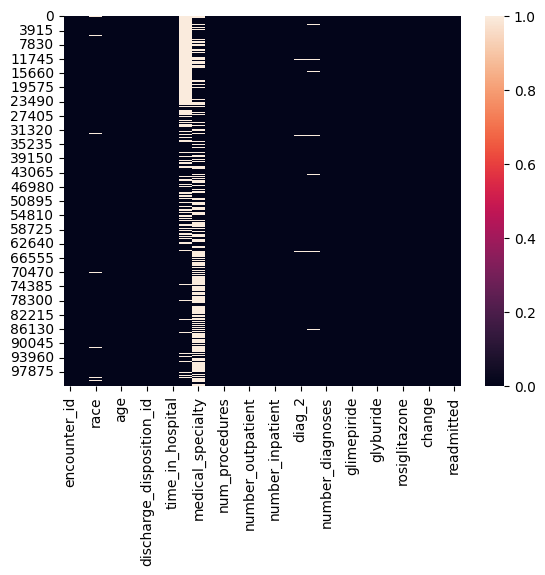

In [ ]:
# Check for missing values
sns.heatmap(diabete.isnull())

In [ ]:
# Print column names that have missing values
for i in diabete.columns:
  print(i, diabete[diabete[i].isnull() == True].shape[0])

encounter_id 0
patient_nbr 0
race 2273
gender 0
age 0
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40256
medical_specialty 49949
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
metformin 0
glimepiride 0
glipizide 0
glyburide 0
pioglitazone 0
rosiglitazone 0
insulin 0
change 0
diabetesMed 0
readmitted 0




__1.   Medical specialty__



- Medical specialty column has the highest number of missing values so we need to identify its distribution

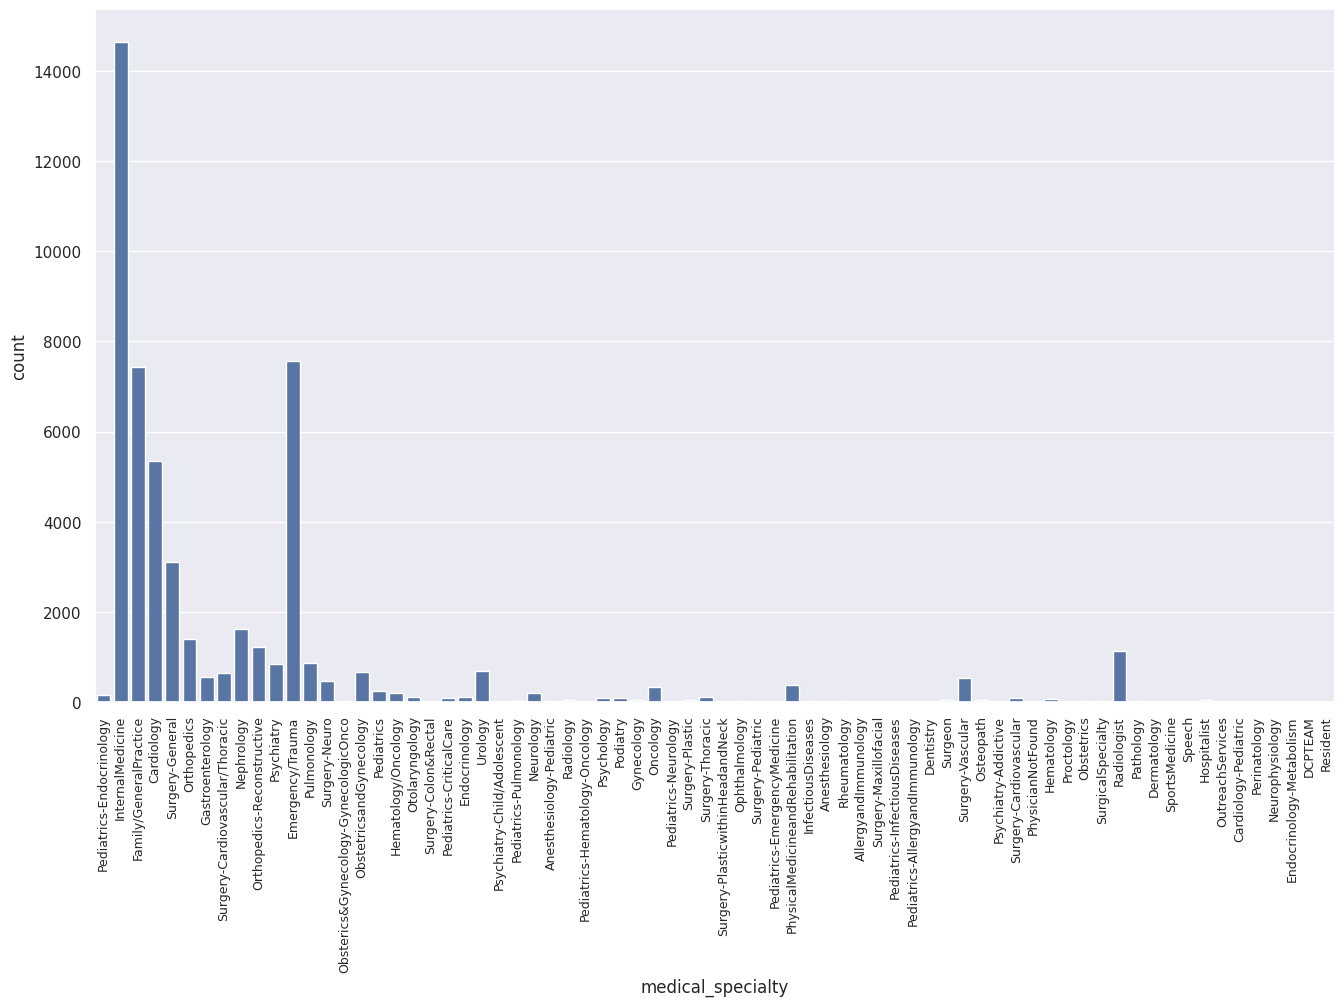

In [ ]:
sns.set(rc={'figure.figsize':(16,9)})
sns.countplot(x='medical_specialty', data = diabete)
plt.xticks(rotation=90, size = 9)
plt.show()

- According to the dataset, the 'medical_specialty' column is the expertise of admitting physicians, such as: Cardiology, Surgeon, etc. Since there are so many missing values, no correlation with the admitted patients and our predictive model, plus the distribution was unequal so we decided to drop this column.

In [ ]:
# Drop column
diabete.drop(columns =['medical_specialty'], inplace = True)

In [ ]:
# Check if deleted column still exist
def column_check(df, column_name):
  if column_name in df.columns:
    print('Column exists')
  else:
    print('Column does not exist')

column_check(diabete, 'medical_specialty')

Column does not exist




__2.   Payer code__



- Based on the dataset, 'payer_code' is the integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay.

In [ ]:
diabete['payer_code'].value_counts()

payer_code
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64

- The 'payer_code' column is how the patient pay their medical expense so it is irrelevant to our predictive model. We decided to drop this column as well.

In [ ]:
# Drop column
diabete.drop(columns =['payer_code'], inplace = True)

In [ ]:
# Check if deleted column still exist
column_check(diabete, 'payer_code')

Column does not exist



__3.   Race__



In [ ]:
diabete['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [ ]:
# Number of missing value in 'race'
diabete['race'].isnull().value_counts()

race
False    99493
True      2273
Name: count, dtype: int64

In [ ]:
# Fill missing values as Other in 'race' column
diabete['race'].fillna('Other', inplace=True)

In [ ]:
# Check for number of missing value again
diabete['race'].isnull().value_counts()

race
False    101766
Name: count, dtype: int64



__4.   Diag_1/2/3__



- Diag_1 is the primary diagnosis (coded as first three digits of ICD9); 848 distinct values.

- Diag_2 is secondary diagnosis (coded as first three digits of ICD9); 923 distinct values.

- Diage_3 is the additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

In [ ]:
for i in diabete.columns:
  print(i, diabete[diabete[i].isnull() == True].shape[0])

encounter_id 0
patient_nbr 0
race 0
gender 0
age 0
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
metformin 0
glimepiride 0
glipizide 0
glyburide 0
pioglitazone 0
rosiglitazone 0
insulin 0
change 0
diabetesMed 0
readmitted 0


In [ ]:
# Percentage of missing value in diag_1/2/3 columns
print('% of missing rows in diag_1', diabete['diag_1'].isna().mean()*100)
print('% of missing rows in diag_2', diabete['diag_2'].isna().mean()*100)
print('% of missing rows in diag_3', diabete['diag_3'].isna().mean()*100)

% of missing rows in diag_1 0.02063557573256294
% of missing rows in diag_2 0.3517874339170253
% of missing rows in diag_3 1.398305917497003


- Since it only makes up to less than 2% of total data points, we fill the missing value by replacing them with the most frequent value corresponding to diag_1,_2,_3

In [ ]:
# Fill na
mode_1 = diabete['diag_1'].mode().iloc[0]
diabete['diag_1'].fillna(mode_1, inplace=True)

In [ ]:
mode_2 = diabete['diag_2'].mode().iloc[0]
diabete['diag_2'].fillna(mode_2, inplace=True)

In [ ]:
mode_3 = diabete['diag_3'].mode().iloc[0]
diabete['diag_3'].fillna(mode_3, inplace=True)

In [ ]:
# Check missing values
for i in diabete.columns:
  print(i, diabete[diabete[i].isnull() == True].shape[0])

encounter_id 0
patient_nbr 0
race 0
gender 0
age 0
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 0
diag_2 0
diag_3 0
number_diagnoses 0
metformin 0
glimepiride 0
glipizide 0
glyburide 0
pioglitazone 0
rosiglitazone 0
insulin 0
change 0
diabetesMed 0
readmitted 0


- There are no missing values in the dataset. Now we can move to EDA

# __EDA__

__1. Check if the data is Times Series or not__

In [ ]:
print('There are', len(diabete['patient_nbr'].unique()), 'unique patients in the data.')
print('There are', len(diabete['encounter_id'].unique()), 'unique encounters in the data.')

There are 71518 unique patients in the data.
There are 101766 unique encounters in the data.


In [ ]:
len(diabete['encounter_id'].unique())/len(diabete['patient_nbr'].unique())

1.4229424760200229

In [ ]:
single_encounter_patients = diabete.groupby('patient_nbr')['encounter_id'].count().reset_index(name='encounter_count')
single_encounter_count = single_encounter_patients[single_encounter_patients['encounter_count'] == 1].shape[0]
print(f"There are {single_encounter_count} patients with only 1 encounter.")

There are 54745 patients with only 1 encounter.


- One patient has more than 1 time of visiting the hostpital (numbered as encounter ID). In other words, there are duplicates in patient_nbr
- An average patient visited 1.4 times
- There are 54745 patients that visited the hospital only once
- Overall, this is not a Times Series Data

__2. Readmitted is our predictive variable so it's important to check__

In [ ]:
diabete['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

<Axes: xlabel='readmitted', ylabel='count'>

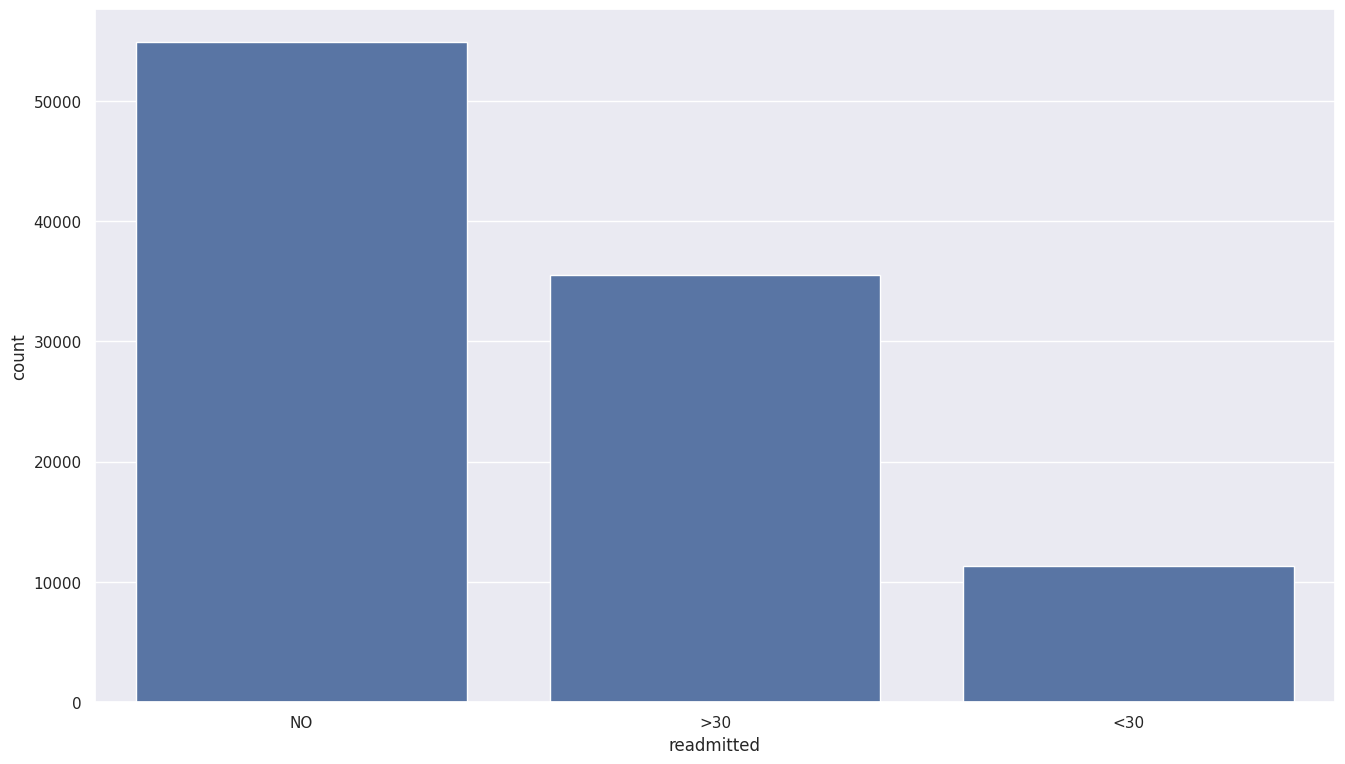

In [ ]:
sns.countplot(x='readmitted',data=diabete)

- Convert into binary categorical variable for the predictive model

In [ ]:
def change_label(text):
    if text == '>30' or text =='<30':
        return 'Yes'
    else:
        return 'No'

diabete['readmitted_2'] =diabete['readmitted'].apply(change_label)
diabete['readmitted_2'].value_counts()

readmitted_2
No     54864
Yes    46902
Name: count, dtype: int64

<Axes: xlabel='readmitted_2', ylabel='count'>

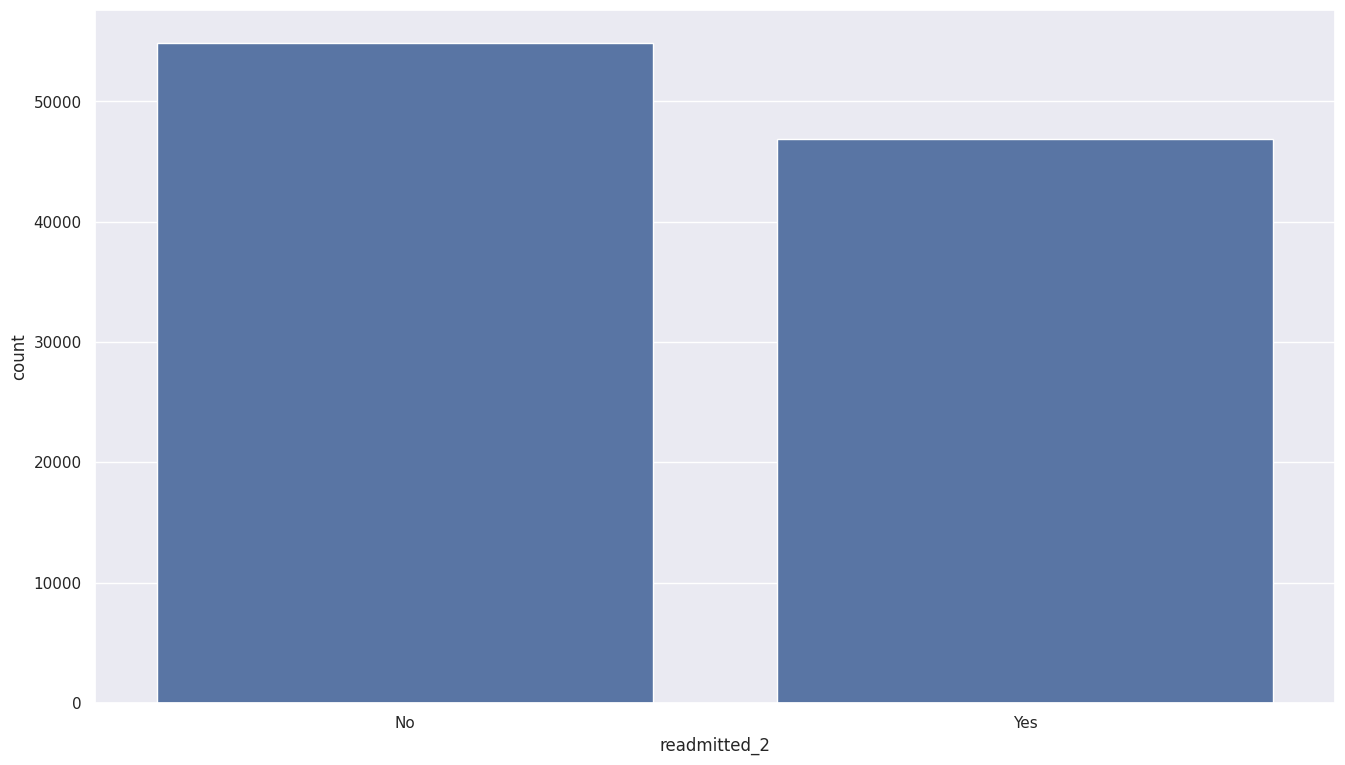

In [ ]:
sns.countplot(x='readmitted_2',data=diabete)

- So we don't have IMBALANCED in this case for the predictive variable because we have it nearly 50/50 ratio for Yes/No

__3. Convert age into numerical data__

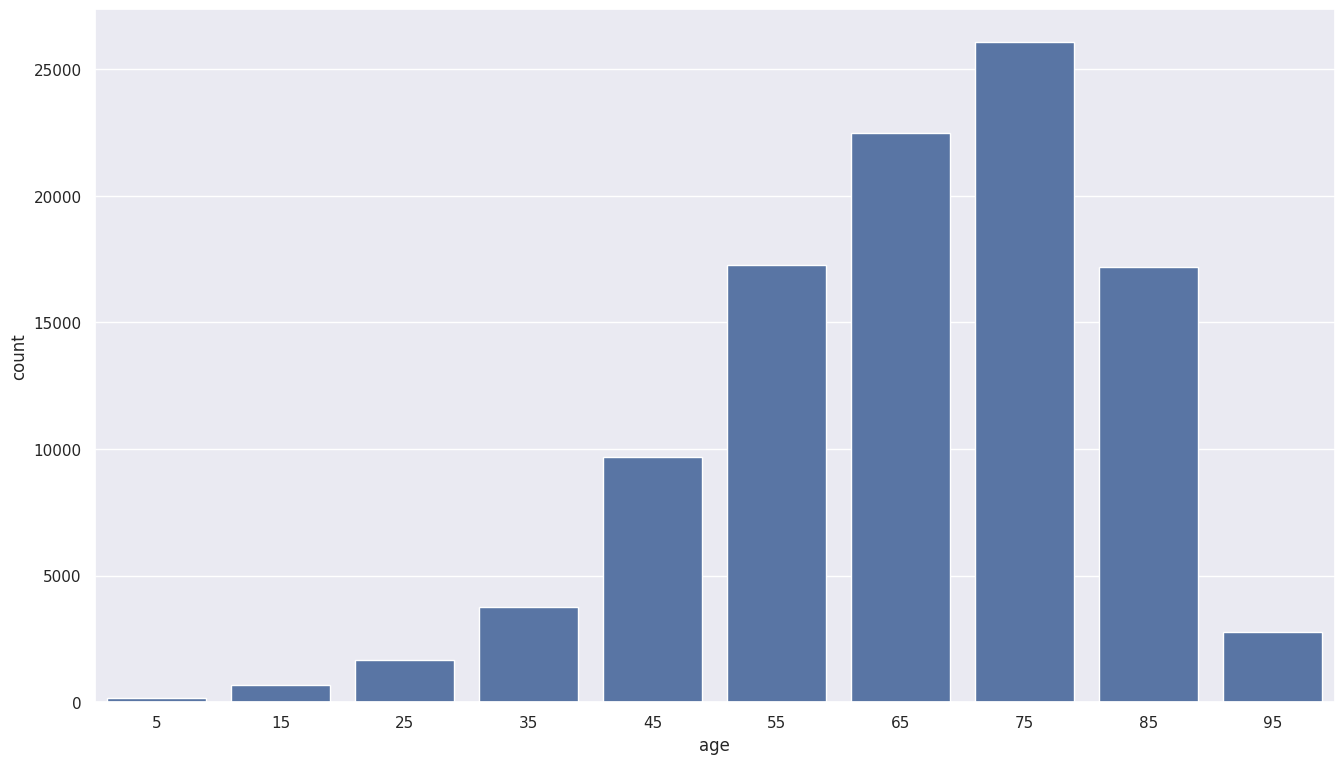

In [ ]:
diabete.age = diabete.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", data = diabete)
plt.show()

- The distribution of age of diabetic patients is left-skewed and with an average of 75 years old

In [ ]:
# Check the
diabete.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,readmitted_2
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,No
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,...,No,No,No,No,No,Up,Ch,Yes,>30,Yes
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,...,No,Steady,No,No,No,No,No,Yes,NO,No
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,...,No,No,No,No,No,Up,Ch,Yes,NO,No
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,...,No,Steady,No,No,No,Steady,Ch,Yes,NO,No


# __Prepare the dataset for machine learning__

- Group the features into 2 groups: categorical and numerical data since some machine learning (ML) models only take numerical data

In [ ]:
# Divide into 2 groups
cat_data = diabete.select_dtypes('O')
num_data = diabete.select_dtypes(np.number)

In [ ]:
# Categorical features
cat_data.head()

,race,gender,diag_1,diag_2,diag_3,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,readmitted_2
0,Caucasian,Female,250.83,276,250,No,No,No,No,No,No,No,No,No,NO,No
1,Caucasian,Female,276,250.01,255,No,No,No,No,No,No,Up,Ch,Yes,>30,Yes
2,AfricanAmerican,Female,648,250,V27,No,No,Steady,No,No,No,No,No,Yes,NO,No
3,Caucasian,Male,8,250.43,403,No,No,No,No,No,No,Up,Ch,Yes,NO,No
4,Caucasian,Male,197,157,250,No,No,Steady,No,No,No,Steady,Ch,Yes,NO,No


In [ ]:
# Quantitative features
num_data.head()

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2278392,8222157,5,6,25,1,1,41,0,1,0,0,0,1
1,149190,55629189,15,1,1,7,3,59,0,18,0,0,0,9
2,64410,86047875,25,1,1,7,2,11,5,13,2,0,1,6
3,500364,82442376,35,1,1,7,2,44,1,16,0,0,0,7
4,16680,42519267,45,1,1,7,1,51,0,8,0,0,0,5


In [ ]:
num_data.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

<Axes: >

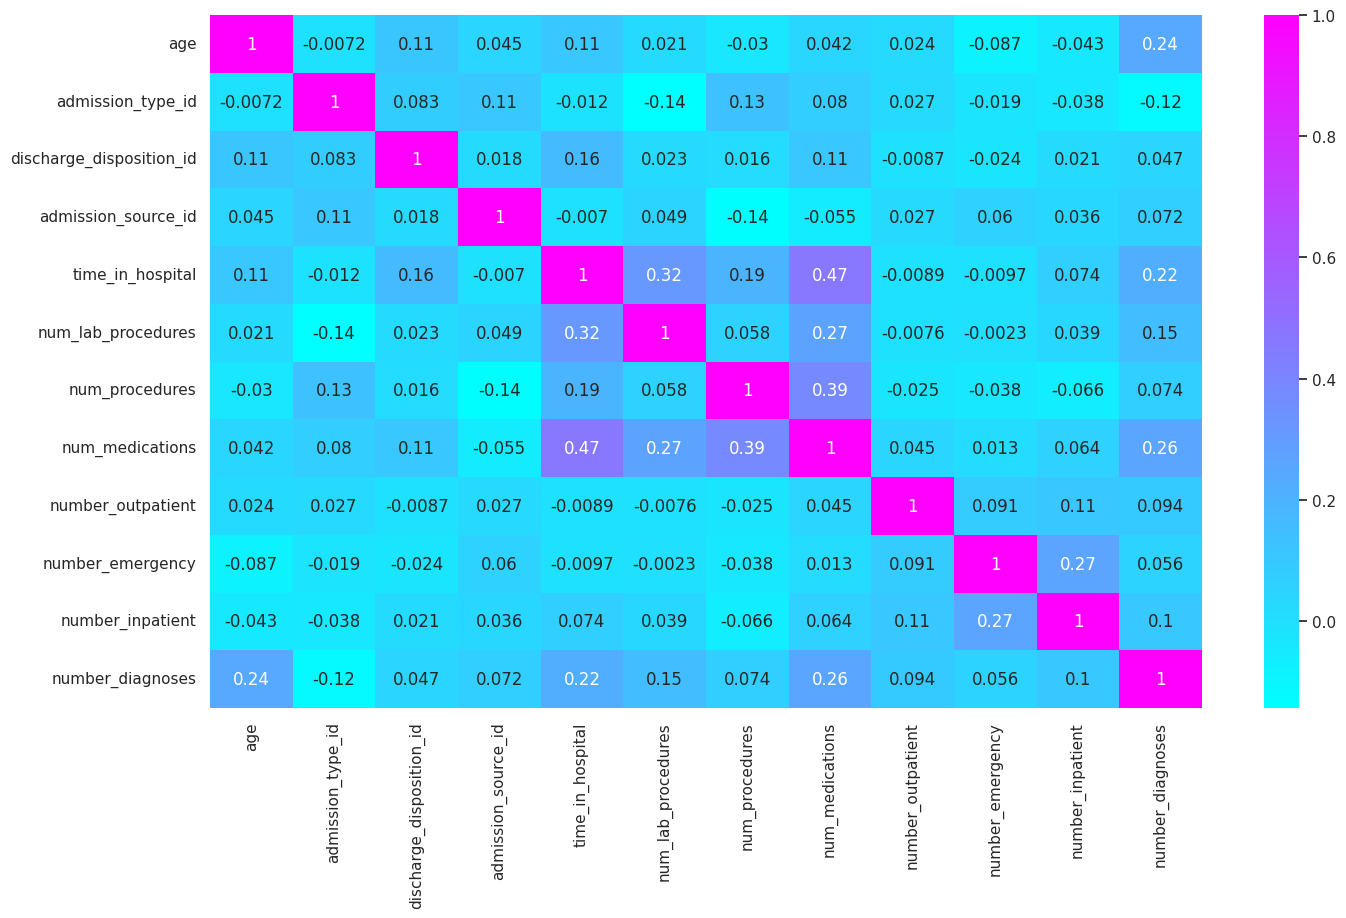

In [ ]:
# Check for correlation between numerical variables
sns.heatmap(num_data.corr(),cmap='cool',annot=True)

- There seems to be no strong linear relationship between numerical variables in the dataset

__Transform categorical data into numerical__

As mentioned above, there are many models that won't take categorical data but our dataset consists large amount of them so we use the LableEncoder function to transform them into quantitative data

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical data into numerical data
LE = LabelEncoder()

for i in cat_data:
  cat_data[i] = LE.fit_transform(cat_data[i])

In [ ]:
# Check the categorical df
cat_data.head()

,race,gender,diag_1,diag_2,diag_3,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,readmitted_2
0,2,0,124,133,86,1,1,1,1,1,1,1,1,0,2,0
1,2,0,143,79,121,1,1,1,1,1,1,3,0,1,1,1
2,0,0,454,78,766,1,1,2,1,1,1,1,1,1,2,0
3,2,1,554,97,248,1,1,1,1,1,1,3,0,1,2,0
4,2,1,54,24,86,1,1,2,1,1,1,2,0,1,2,0


- Concatenate both df into 1 final df for ML

In [ ]:
diabete_final = pd.concat([num_data,cat_data],axis=1)
diabete_final.head()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,readmitted_2
0,5,6,25,1,1,41,0,1,0,0,...,1,1,1,1,1,1,1,0,2,0
1,15,1,1,7,3,59,0,18,0,0,...,1,1,1,1,1,3,0,1,1,1
2,25,1,1,7,2,11,5,13,2,0,...,1,2,1,1,1,1,1,1,2,0
3,35,1,1,7,2,44,1,16,0,0,...,1,1,1,1,1,3,0,1,2,0
4,45,1,1,7,1,51,0,8,0,0,...,1,2,1,1,1,2,0,1,2,0


There is still the "readmitted" column that is similar to readmitted_2 so we drop this column

In [ ]:
diabete_final.drop(['readmitted'],axis=1,inplace=True)

In [ ]:
# Check deleted column still exist
column_check(diabete_final, 'readmitted')

Column does not exist


In [ ]:
# Check final df for ML
diabete_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   age                       101766 non-null  int64
 1   admission_type_id         101766 non-null  int64
 2   discharge_disposition_id  101766 non-null  int64
 3   admission_source_id       101766 non-null  int64
 4   time_in_hospital          101766 non-null  int64
 5   num_lab_procedures        101766 non-null  int64
 6   num_procedures            101766 non-null  int64
 7   num_medications           101766 non-null  int64
 8   number_outpatient         101766 non-null  int64
 9   number_emergency          101766 non-null  int64
 10  number_inpatient          101766 non-null  int64
 11  number_diagnoses          101766 non-null  int64
 12  race                      101766 non-null  int64
 13  gender                    101766 non-null  int64
 14  diag_1              

The final dataframe now has no missing value and moved down from 50 features to 27 numerical features after cleaning and transformation

# __Split dataset into training and testing data__

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X,y = diabete_final.drop('readmitted_2',axis=1), diabete_final['readmitted_2']

X_train, X_test, y_train, y_test = train_test_split(diabete_final.drop('readmitted_2',axis=1),
                                                    diabete_final['readmitted_2'],
                                                    test_size=0.30,
                                                    random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(71236, 26)
(30530, 26)


# __Logistic regression model from full features dataset__

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
logmodel = LogisticRegression(C=0.001)

In [ ]:
%%time
# Train the model using training data
logmodel.fit(X_train,y_train)

CPU times: user 2.19 s, sys: 906 ms, total: 3.1 s
Wall time: 3.81 s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.001)

In [ ]:
# Fit the testing data into the model
predictions = logmodel.predict(X_test)

In [ ]:
# Accuracy of the logit model
print('Table of prediction model from full features: \n',classification_report(y_test,predictions,target_names= ['Not Readmitted', 'Readmitted']))

Table of prediction model from full features: 
                 precision    recall  f1-score   support

Not Readmitted       0.61      0.78      0.69     16564
    Readmitted       0.61      0.41      0.49     13966

      accuracy                           0.61     30530
     macro avg       0.61      0.59      0.59     30530
  weighted avg       0.61      0.61      0.60     30530



In [ ]:
confusion_matrix(y_test,predictions)

array([[12980,  3584],
       [ 8291,  5675]])

<Axes: xlabel='Predicted', ylabel='Actual'>

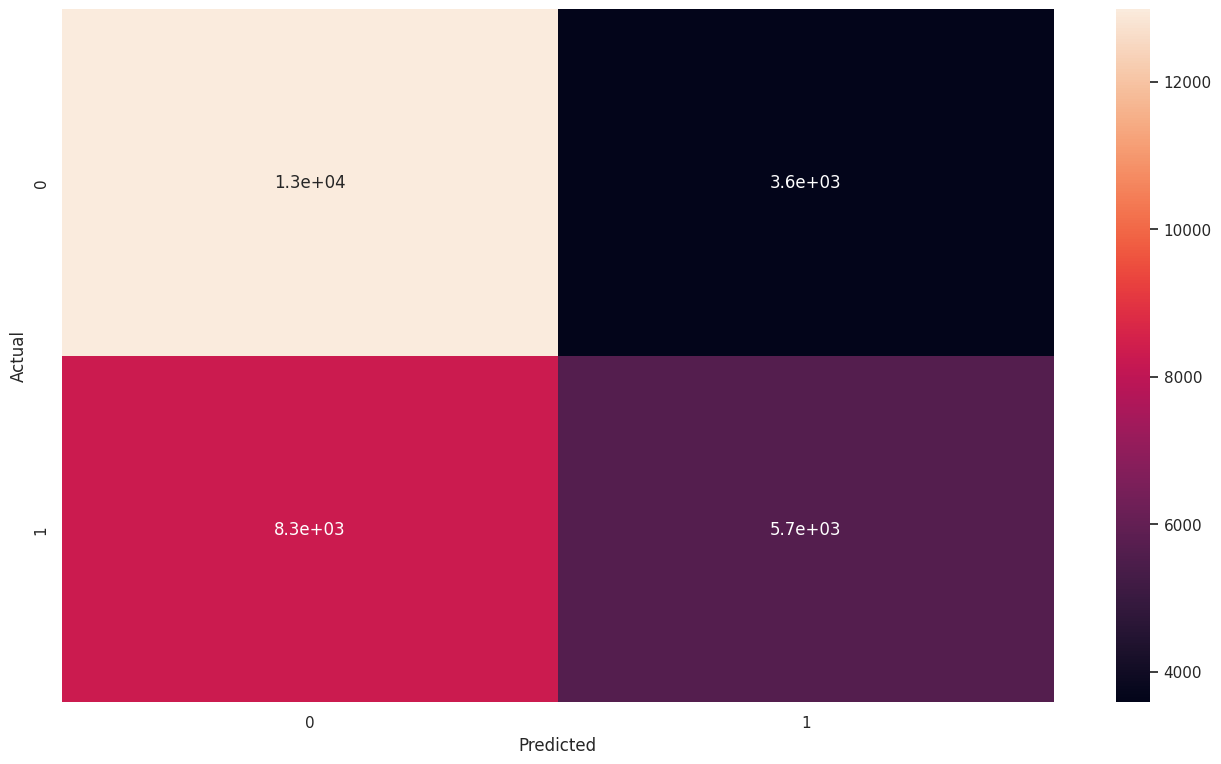

In [ ]:
# Heatmap of confusion matrix
conf_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

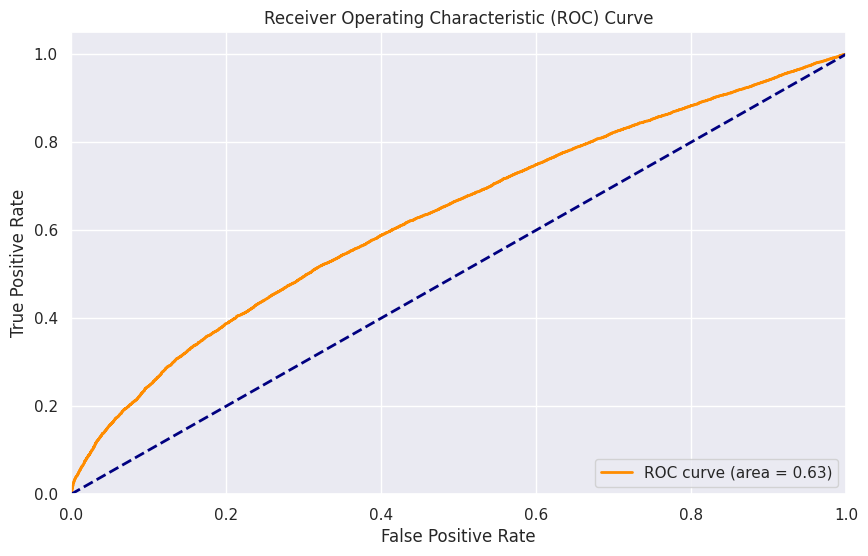

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Predict probabilities
y_prob = logmodel.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

__Using the Logit Regression, it gives us a model with 61% precision. Precision is a measure of how many of the positive predictions made are correct (true positives). Recall, aka Sensitivity, is how many of the positive cases the classifier correctly predicted, here is higher when y=0 (not readmitted) which led to higher f1 score as well since f1 is how many of the positive cases the classifier correctly predicted__

# __Apply ShapRFECV to the logistic regression__

In [ ]:
%%time
shap_elimination = ShapRFECV(model=logmodel, step=0.2, cv=10, scoring="roc_auc", n_jobs=3)
report = shap_elimination.fit_compute(X_train, y_train)

CPU times: user 4.55 s, sys: 1.22 s, total: 5.77 s
Wall time: 1min 24s


- step = 0.2 means 20% of the features are removed at each step. If there are 100 features initially, 20 features will be removed in the first iteration, then 20% of the remaining features in the next iteration, and so on
- cv = 10 means 10-fold cross-validation will be used to evaluate the model performance for each subset of features. The dataset is split into 10 parts, the model is trained on 9 parts and tested on the remaining part, and this process is repeated 10 times.
- scoring = 'roc_auc' means (ROC AUC) score is used as the evaluation metric
- n_jobs = 3 means 3 jobs will run in parallel to reduce run time

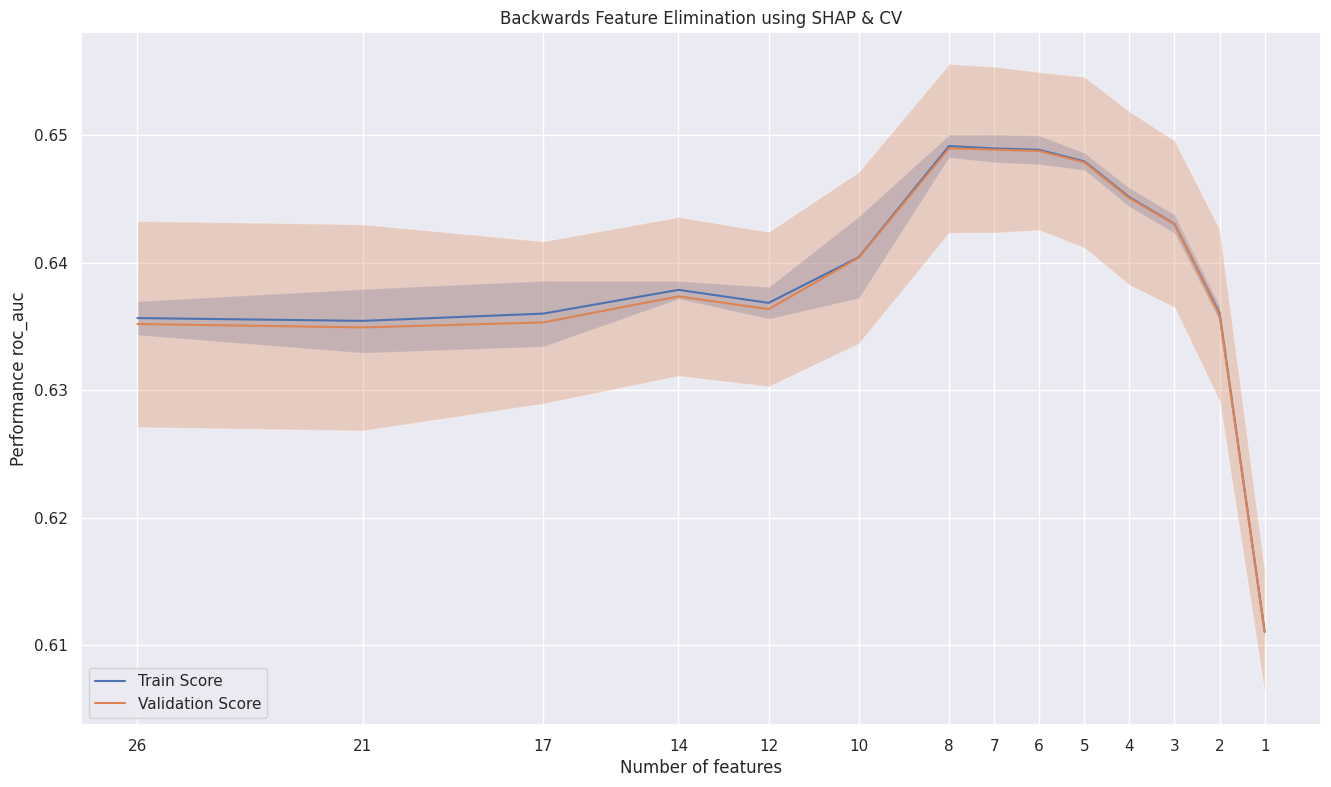

In [ ]:
performance_plot = shap_elimination.plot()

__ShapRFECV estimates peak performance of ROC AUC when the dataset contains 8 features__

In [ ]:
# Get final feature set
final_features_set = shap_elimination.get_reduced_features_set(num_features=8)
final_features_set

['num_procedures',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'race',
 'diag_1',
 'insulin']

In [ ]:
# Create training subset based on FS from ShapRFECV
X_train_logit = X_train[final_features_set]
X_test_logit = X_test[final_features_set]

In [ ]:
X_train_logit.head()

,num_procedures,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race,diag_1,insulin
50293,3,0,1,0,6,2,440,1
23622,1,0,0,0,9,2,236,2
75121,0,0,0,0,9,2,510,1
86741,0,0,0,0,9,2,553,1
48286,5,0,0,0,9,2,263,2


In [ ]:
%%time
# Train the model using training subset from ShapRFECV
logmodel.fit(X_train_logit,y_train)

CPU times: user 967 ms, sys: 551 ms, total: 1.52 s
Wall time: 1.47 s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.001)

In [ ]:
predictions_shap = logmodel.predict(X_test_logit)

In [ ]:
print('Table of prediction model from features selected by ShapRFECV: \n',classification_report(y_test, predictions_shap, target_names= ['Not Readmitted', 'Readmitted']))

Table of prediction model from features selected by ShapRFECV: 
                 precision    recall  f1-score   support

Not Readmitted       0.61      0.82      0.70     16564
    Readmitted       0.64      0.37      0.47     13966

      accuracy                           0.62     30530
     macro avg       0.62      0.60      0.58     30530
  weighted avg       0.62      0.62      0.59     30530



In [ ]:
confusion_matrix(y_test,predictions)

array([[12980,  3584],
       [ 8291,  5675]])

<Axes: xlabel='Predicted', ylabel='Actual'>

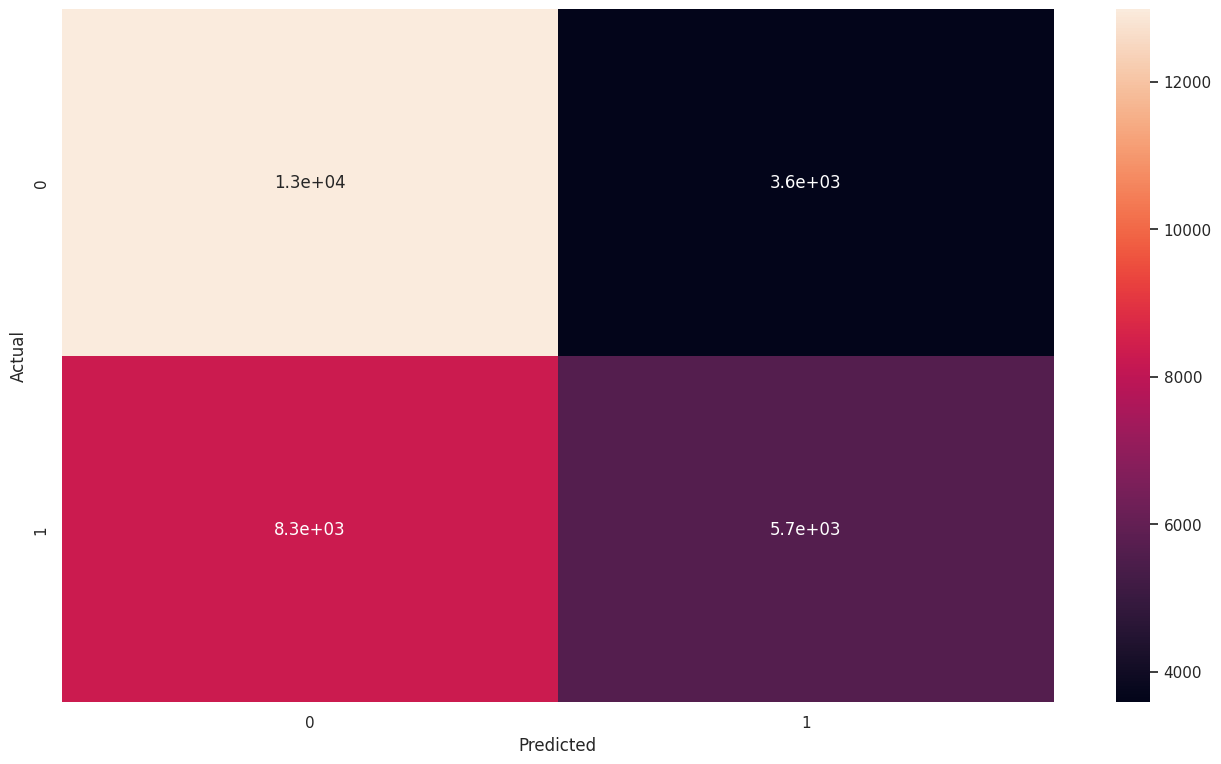

In [ ]:
conf_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

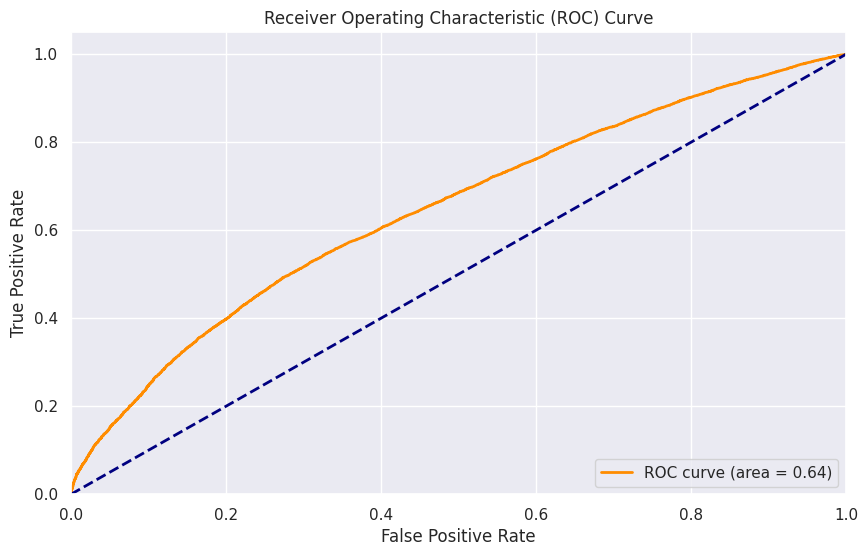

In [ ]:
# Predict probabilities
y_prob = logmodel.predict_proba(X_test_logit)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# __Conclusion__

__1. Compare full feature logit model vs ShapRFECV logit model__

In [ ]:
# Model precision results
print('Table of prediction model from full features: \n',classification_report(y_test,predictions,target_names= ['Not Readmitted', 'Readmitted']))
print('Table of prediction model from features selected by ShapRFECV: \n',classification_report(y_test, predictions_shap, target_names= ['Not Readmitted', 'Readmitted']))

Table of prediction model from full features: 
                 precision    recall  f1-score   support

Not Readmitted       0.61      0.78      0.69     16564
    Readmitted       0.61      0.41      0.49     13966

      accuracy                           0.61     30530
     macro avg       0.61      0.59      0.59     30530
  weighted avg       0.61      0.61      0.60     30530

Table of prediction model from features selected by ShapRFECV: 
                 precision    recall  f1-score   support

Not Readmitted       0.61      0.82      0.70     16564
    Readmitted       0.64      0.37      0.47     13966

      accuracy                           0.62     30530
     macro avg       0.62      0.60      0.58     30530
  weighted avg       0.62      0.62      0.59     30530



- Fitting full features into logit model: CPU times: user 1.66 s, sys: 534 ms, total: 2.2 s. Wall time: 1.18 s
- Fitting features from ShapRFECV into logit model: CPU times: user 933 ms, sys: 547 ms, total: 1.48 s. Wall time: 793 ms

**In other words, ShapeRFECV delivers faster time, higher sensitivity in predicting Readmitted cases, higher ROC and comparable f1-score in comparison to the full feature model**

In [ ]:
# ShapRFECV report
report.head()

,num_features,features_set,eliminated_features,train_metric_mean,train_metric_std,val_metric_mean,val_metric_std
1,26,"[age, admission_type_id, discharge_disposition...","[glyburide, glipizide, pioglitazone, glimepiri...",0.635645,0.001333,0.635179,0.008090
2,21,"[age, admission_type_id, discharge_disposition...","[diag_3, metformin, gender, diabetesMed]",0.635425,0.002514,0.634913,0.008095
3,17,"[age, admission_type_id, discharge_disposition...","[admission_type_id, time_in_hospital, admissio...",0.635995,0.002589,0.635303,0.006369
4,14,"[age, discharge_disposition_id, num_lab_proced...","[change, num_lab_procedures]",0.637857,0.000715,0.637343,0.006237
5,12,"[age, discharge_disposition_id, num_procedures...","[diag_2, num_medications]",0.636835,0.001262,0.636346,0.006072


In [ ]:
# Export the DataFrame to a CSV file
filename = 'shap_output.csv'
report.to_csv(filename, index=False)

- train_metric_mean	and train_metric_std are mean and std of performance metric (in this case is ROC AUC) computed on the training set across multiple cross-validation folds. High train_metric_std indicates that the model's performance is unstable on different subsets of the training data
- val_metric_mean	and val_metric_std are mean and std of performance metric (in this case is ROC AUC) computed on the validated set across multiple cross-validation folds. High val_metric_std indicates that the model's performance is unstable on different subsets of the training data
- Medicine features were removed first, which means they have the lowest ranking according to Shapley values. __In other words, the medicine prescribed for the diabetic patients did not affect the readmission probability of patient__

__2. Compare ShapRFECV logit model vs Published Article__

According to the published article, the precision of their proposed predicting model is shown below:

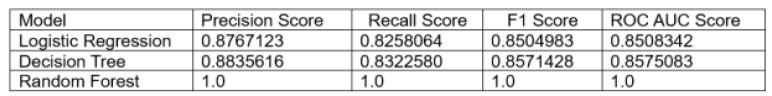

Their logistic regression (LR) model has way higher than this study's ShapRFECV LR model. The reason is probably due to the difference in the cleaning data part:
- Their cleaned dataset consisted of 23 instead of 27 features. Furthermore, they merged and cleaned some values in admission_type_ID discharge_disposition_ID, and admission_source_ID features without specification.
- For example, Admission type ID was merged into emergency, elective, not available and newborn then remove the values of newborns (by dropping the entire row or what?)

__Without the source code, it's not feasible to replicate the same results, not to mention, compare the predicting power of our model to author's__